<a href="https://colab.research.google.com/github/Simolx/Dieudonne/blob/develop/DL_python/chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第2章 神经网络的数学基础


## 2.1 初识神经网络

**加载Keras中的MNIST数据集**

In [0]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step


查看数据情况

In [0]:
s = mnist.load_data()

In [0]:
print(type(s), type(s[0]), type(s[1]))
print(len(s), len(s[0]), len(s[1]))
print(len(s[0][0]))
print(len(s[1][0]))

<class 'tuple'> <class 'tuple'> <class 'tuple'>
2 2 2
60000
10000


In [0]:
print(train_images.shape)
print(train_labels.shape)
print(train_images.ndim, train_labels.ndim)
print(train_images.dtype, train_labels.dtype)
print(train_labels)
print(test_images.shape)


(60000, 28, 28)
(60000,)
3 1
uint8 uint8
[5 0 4 ... 5 6 8]
(10000, 28, 28)


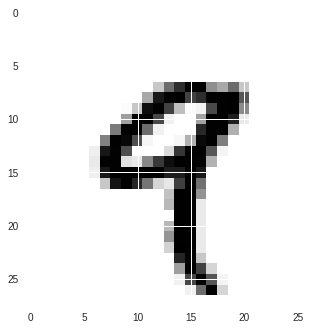

In [0]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

**网络架构**

In [0]:
from keras import models, layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28, )))
network.add(layers.Dense(10, activation='softmax'))

In [0]:
help(network.add)

Help on method add in module keras.engine.sequential:

add(layer) method of keras.engine.sequential.Sequential instance
    Adds a layer instance on top of the layer stack.
    
    # Arguments
        layer: layer instance.
    
    # Raises
        TypeError: If `layer` is not a layer instance.
        ValueError: In case the `layer` argument does not
            know its input shape.
        ValueError: In case the `layer` argument has
            multiple output tensors, or is already connected
            somewhere else (forbidden in `Sequential` models).



In [0]:
help(layers.Dense)

Help on class Dense in module keras.layers.core:

class Dense(keras.engine.base_layer.Layer)
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: if the input to the layer has a rank greater than 2, then
 |  it is flattened prior to the initial dot product with `kernel`.
 |  
 |  # Example
 |  
 |  ```python
 |      # as first layer in a sequential model:
 |      model = Sequential()
 |      model.add(Dense(32, input_shape=(16,)))
 |      # now the model will take as input arrays of shape (*, 16)
 |      # and output arrays of shape (*, 32)
 |  
 |      # after the first layer, you don't need to specify
 |      # the size of the 

**编译步骤**

In [0]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

**准备图像数据**

In [0]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

**准备标签**

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:
help(network.fit)

Help on method fit in module keras.engine.training:

fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, **kwargs) method of keras.engine.sequential.Sequential instance
    Trains the model for a given number of epochs (iterations on a dataset).
    
    # Arguments
        x: Numpy array of training data (if the model has a single input),
            or list of Numpy arrays (if the model has multiple inputs).
            If input layers in the model are named, you can also pass a
            dictionary mapping input names to Numpy arrays.
            `x` can be `None` (default) if feeding from
            framework-native tensors (e.g. TensorFlow data tensors).
        y: Numpy array of target (label) data
            (if the model has a single output),
            or list of Numpy arrays (if the model has 

In [0]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 5s 77us/step - loss: 0.2573 - acc: 0.9260
Epoch 2/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.1045 - acc: 0.9690
Epoch 3/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.0691 - acc: 0.9794
Epoch 4/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.0494 - acc: 0.9852
Epoch 5/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.0373 - acc: 0.9889


In [0]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 65us/step
test_loss: 0.07492900404813699
test_acc: 0.9782


## 2.2 神经网络的数据表示

# 第3章 神经网络入门

## 3.4 电影评论分类：二分类问题

### 3.4.1 IMDB数据集

In [0]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


0: negative, 1: positive

In [0]:
print(train_data.shape, test_data.shape)

(25000,) (25000,)


In [0]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [0]:
max(max(train_data))

9995

In [0]:
max([max(sequence) for sequence in train_data])

9999

In [0]:
#@title 解码
word_index = imdb.get_word_index()
#reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index = {value: key for key, value in word_index.items()}
decoded_review = ' '.join([reverse_word_index.get(i -3, '?') for i in train_data[0]])
print(decoded_review)

1646592/1641221 [==============================] - 0s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
y_test

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [0]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
#@title 配置优化器，使用自定义的损失和指标
from keras import optimizers, losses, metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
            loss=losses.binary_crossentropy,
            metrics=[metrics.binary_accuracy])

In [0]:
#@title 预留验证集
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.5499 - acc: 0.7677 - val_loss: 0.4321 - val_acc: 0.8679
Epoch 2/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.3465 - acc: 0.8951 - val_loss: 0.3438 - val_acc: 0.8659
Epoch 3/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.2508 - acc: 0.9211 - val_loss: 0.2903 - val_acc: 0.8908
Epoch 4/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.1934 - acc: 0.9391 - val_loss: 0.2843 - val_acc: 0.8883
Epoch 5/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.1574 - acc: 0.9508 - val_loss: 0.2945 - val_acc: 0.8838
Epoch 6/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.1281 - acc: 0.9617 - val_loss: 0.2898 - val_acc: 0.8871
Epoch 7/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.1065 - acc: 0.9688 - val_loss: 0.3084 - 

In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

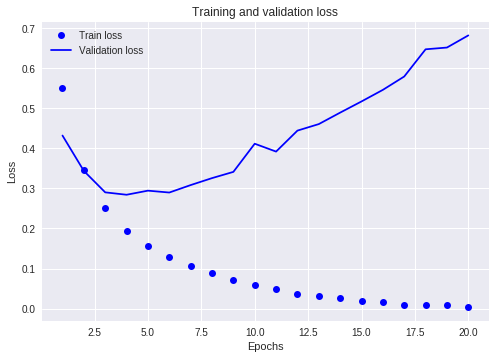

In [0]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Train loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

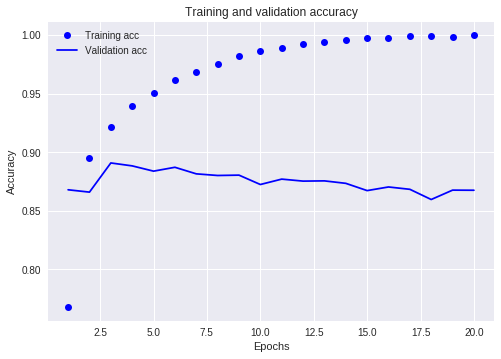

In [0]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
result = model.evaluate(x_test, y_test)

result

Epoch 1/4
25000/25000 [==============================] - 2s 78us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 2s 71us/step - loss: 0.2666 - acc: 0.9096
Epoch 3/4
25000/25000 [==============================] - 2s 82us/step - loss: 0.1987 - acc: 0.9292
Epoch 4/4
25000/25000 [==============================] - 4s 163us/step


[0.3238553698825836, 0.87308]

In [0]:
model.predict(x_test)

array([[0.13560075],
       [0.9997118 ],
       [0.27816346],
       ...,
       [0.07139969],
       [0.04283793],
       [0.47383907]], dtype=float32)

## 3.5 新闻分类：多分类问题

## 3.6 预测房价：回归问题